# Dik freatisch pakket infiltreert niet lekker (H2O Nr. 5 1995) door Kees Maas

### The problem:

Een infiltratiesloot die afvoert heeft een debiet dat lager is naarmate het pakket dikker is.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

## Analytical solution for flow into a ditich of width b into an aquifer of half-infinite extent


Let the ditch be at the top of the aquifer between the points A and B where B.real > A.real. Later on we can take A=O, the center of the axes.
We wil solve the problem by conformal mapping using the sin transformation.

When showing the results we'le use some marker points to recognaize the plane in after each transformation.

We define a few marker points in the z-plane.

    Ctop : z = 1.5 * b
    B :    z = b
    A :    z = a
    O :    z = 0
    D :    z = 0 - 1j * H
    Cbot : z = 1.5 * b -1j * H

    b > a

The width of the ditch is b - a (of just B - A), so that it is assumed that B is to the right of A, b > a.

Let's first define the points and show them

In [167]:
def get_points(H=None, b=None, a=None):
    """Get the points A, B, Ctop, Cbot, D for the conformal mapping."""
    return {'Ctop': 1.5 * b - 1e-6 * 1j,
    'B':  b,
    'A': a,    
    'O':  1e-6    - 1e-6 * 1j,
    'D':  1e-6     -1j * (H - 1e-6),
    'Cbot': 1.5 * b - 1j * (H - 1e-6)
    }


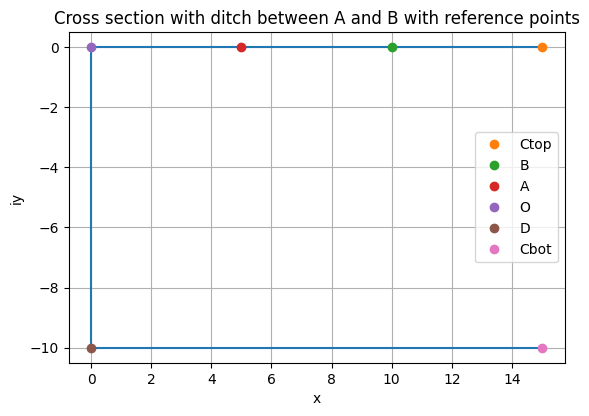

In [ ]:
# Plot the cross section with the points
H, a, b = 10, 5, 10

# --- the points (are in a dictionary)
pnts = get_points(H=H, b=b, a=a)

# --- as an array for eacsy ploting
Zpnts = np.array([pnts[pnm] for pnm in pnts])

# --- Show them
fig, ax = plt.subplots()
ax.set(title='Cross section with ditch between A and B with reference points', xlabel='x', ylabel='iy')
ax.grid(True)

# --- plot them as a line
ax.plot(Zpnts.real, Zpnts.imag)

# --- plot the as dots
for pnm, p in pnts.items():
    ax.plot(p.real, p.imag, 'o', label=pnm)

ax.set_aspect(1.0)
ax.legend()



## Conformal mapping using the sin fuction

First step, scale it match height $\pi$, lift it to make the middle of the left end of the aquifer the center, then turn clockwise over $\pi/2$ by multiplying with $i$ and then take the sin to project the entire aquifer boundary onto the real axis.

$$ \zeta=\sin\left(\pi\left(i\frac{z}{d}-\frac{1}{2}\right)\right)$$

The scale and move to get the points $\zeta(B)$ and $\zeta(A)$ on points -1, +1. This transformation is

$$ p \zeta + q$$

with $p$ and $q$ still to be determined.

The take the $arcsin$ to fold the real axis outside the points -1 and +1 up again, after which these two points will be on $-\frac \pi 2$ and $+\frac \pi 2$. Devide by $\pi$ to put these points at $\pm 1$ and multiply by $-i$ to rotate clockwise over $\pi/2$. Then add $i /2$ so that the y-coordinates of the transformed points will be all between  0 and 1. Finally multiply by the total extraction $Q$ to get the stream function

$$ \Omega = Q \left[ -i  \frac{\arcsin\left(p \, \zeta + q\right)} \pi + i \frac 1 2 \right] $$

$$ \Omega = -i Q \left[ \frac{\arcsin\left(p \, \zeta + q\right)} \pi - \frac 1 2 \right] $$

$p$ and $q$ follow from the requirement that $\zeta(B) \to -1$ and $\zeta(A) \to 1$

$$p\,\zeta_B + q = -1$$
$$p\,\zeta_A + q = +1$$

Which yields

$$ p = \frac {-2}{\zeta_B - \zeta_A}$$
$$ q = \frac{\zeta_B + \zeta_A}{\zeta_B -\zeta_A}$$

## Terugtransformation from $\Omega$ to $z$

$$\Omega = -iQ\left[\frac{1}{\pi}\arcsin\left(p\zeta + q\right)-\frac{1}{2}\right]$$

$$\Omega=-iQ\left[\frac{1}{\pi}\arcsin\left(p\,\sin\left(\pi\left(\frac{z}{H}+i\frac{1}{2}\right)\right)+q\right)-\frac{1}{2}\right]$$

$$\sin\left(\pi\left(i\frac{\Omega}{Q}+\frac{1}{2}\right)\right)=p\,\sin\left(\pi\left(\frac{z}{H}+i\frac{1}{2}\right)\right)+q$$

$$\arcsin\left(\frac{\sin\left(\pi\left(i\frac{\Omega}{Q}+\frac{1}{2}\right)\right)-q}{p}\right)=\pi\left(\frac{z}{H}+i\frac{1}{2}\right)$$

$$-i\frac{H}{2}+\frac{H}{\pi}\arcsin\left(\frac{\sin\left(\pi\left(i\frac{\Omega}{Q}+\frac{1}{2}\right)\right)-q}{p}\right)=z$$

$$z=-i\frac{H}{2}+\frac{H}{\pi}\arcsin\left(\frac{\sin\left(\pi\left(i\frac{\Omega}{Q}+\frac{1}{2}\right)\right)-q}{p}\right)$$

### Testing back and forth

We take a z-point fill this into the function for $\Omega$ and fill the result back into reverse transformation. See afte the defs of the functions
 

In [197]:
def zetas_sin(i=0, z=None, D=None, A=None, B=None):
    """Return the values on the respective w-planes"""
    H = abs(D.imag)
    w = z
    if i > 0:
        w = np.pi * (1j * w  / H - 1 / 2)        
    if i > 1:
        w = np.sin(w)
    if i > 2:
        p, q = get_pq_sin(D=D, A=A, B=B)
        w = p * w + q
    if i > 3:
        w = np.arcsin(w)
    if i > 4:
        w = -1j * w * H / np.pi - 1j * H / 2
    if i > 5:
         w = w / H
    return w

def omega_sin(z=None, Q=None, D=None, A=None, B=None):
    return Q * zetas_sin(i=6, z=Z, D=D, A=A, B=B)

def zta_sin(z=None, D=None):
    H = abs(D.imag)
    return np.sin(np.pi * (1j * z  / H - 1 / 2))
    

def get_points(H=None, b=None, a=None):
    """Get the points A, B, Ctop, Cbot, D for the conformal mapping."""
    return {'Ctop': 1.5 * b - 1e-6 * 1j,
    'B':  b,
    'A': a,    
    'O':  1e-6    - 1e-6 * 1j,
    'D':  1e-6     -1j * (H - 1e-6),
    'Cbot': 1.5 * b - 1j * (H - 1e-6)
    }

def get_pq_sin(D=None, A=None, B=None):
    """Calculate p and q for the conformal mapping."""        
    H = abs(D.imag)
    wA = np.sin(np.pi * (1j * A  / H - 1 / 2))
    wB = np.sin(np.pi * (1j * B  / H - 1 / 2))
    p = -2 / (wB - wA)
    q = (wB + wA) / (wB - wA)    
    return p, q


def omega_fr_z_sin(z=None, Q=None, D=None, A=None, B=None):
    H = abs(D.imag)
    p, q = get_pq_sin(D=D, A=A, B=B)
    zeta = np.sin(np.pi * (1j * z / H - 1 / 2))
    return -1j * Q * (np.arcsin(p * zeta + q) / np.pi - 1 / 2)

def z_fr_omega_sin(om=None, Q=None, D=None, A=None, B=None):
    H = abs(D.imag)
    p, q = get_pq_sin(D=D, A=A, B=B)
    w = np.sin(np.pi * (1j * om / Q + 1 / 2))
    return -1j * H * (np.arcsin((w - q) / p) / np.pi + 1/2)


Q, H, b, a = 1.0, 10., 15., 5.

pnts = get_points(H=H, b=b, a=a)

zp1 = 10 - 5 * 1j

op1 = omega_fr_z_sin(zp1, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])
zp2 = z_fr_omega_sin(op1, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

print('=== z -> o -> z =======')
print(f"zp1 : {zp1:.3f}")
print(f"op1 : {op1:.3f}")
print(f"zp2 : {zp2:.3f}")

op2 = 0.5 + 1j * 0.5
zp3 = z_fr_omega_sin(op2, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])
op3 = omega_fr_z_sin(zp3, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

print('=== o -> z -> o =======')
print(f"op2 : {op2:.3f}")
print(f"zp3 : {zp3:.3f}")
print(f"op3 : {op3:.3f}")


=== z -> o -> z =======
zp1 : 10.000-5.000j
op1 : 0.238+0.178j
zp2 : 10.000-5.000j
=== o -> z -> o =======
op2 : 0.500+0.500j
zp3 : 15.625-3.587j
op3 : 0.500+0.500j


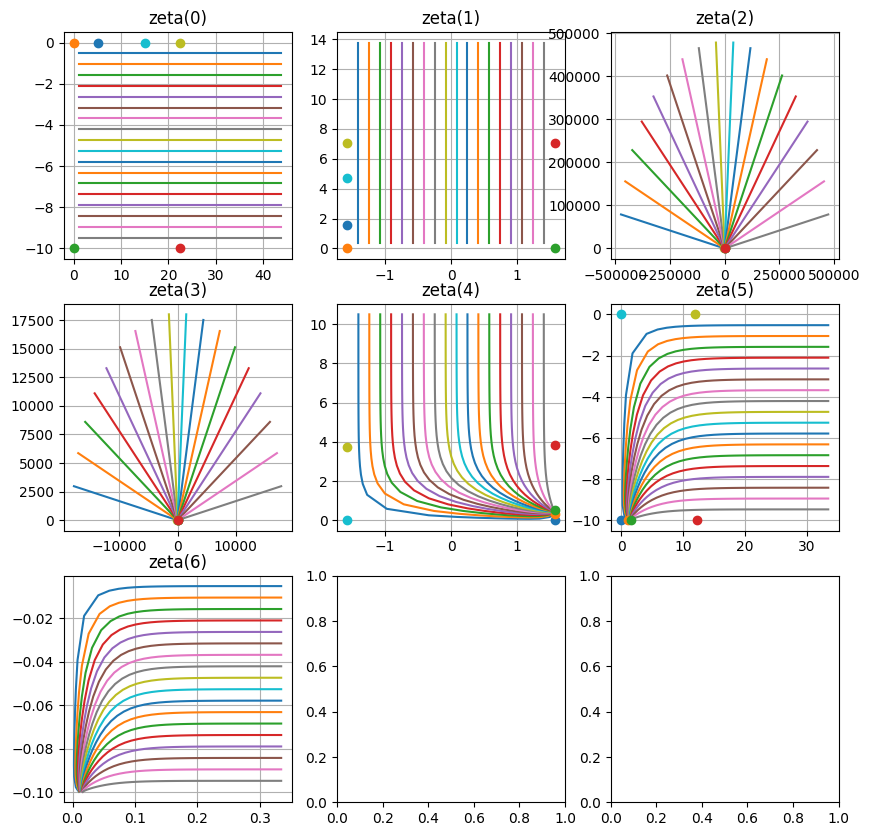

In [193]:
Q, H, b, a = 1.0, 10., 25., 20.
Q, H, b, a = 1.0, 10., 15., 5.

x = np.linspace(0, pnts['Ctop'].real * 2, 40)[1:-1]
y = np.linspace(0, pnts['D'].imag, 20)[1:-1]
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for ia, ax in enumerate(axs.flatten()):
    if ia > 6:
        break
    ax.set_title(f"zeta({ia})")
    ax.grid(True)
    zta = zeta_sin(ia, z=Z, D=pnts['D'], A=pnts['A'], B=pnts['B'])
    if ia > 5: # Omega 
        zta = zta * Q  /H
    ax.plot(zta.T.real, zta.T.imag)
    for pnm in pnts:
        if ia > 5:
            continue
        P = zeta_sin(ia, z=pnts[pnm], D=pnts['D'], A=pnts['A'], B=pnts['B'])
        ax.plot(P.real, P.imag, 'o', label=pnm)


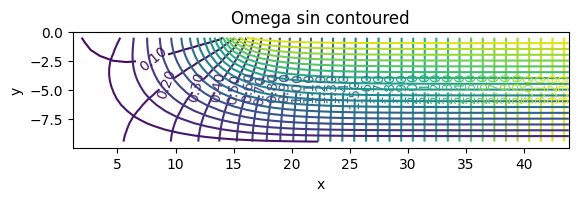

In [194]:
om = omega_sin(z=Z, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

fig, ax = plt.subplots()
ax.set(title='Omega sin contoured', xlabel='x', ylabel='y')
C = ax.contour(Z.real, Z.imag, om.real, levels=40)
ax.clabel(C, levels=C.levels, fmt='%2.2f')
C = ax.contour(Z.real, Z.imag, om.imag, levels=20)
# ax.clabel(C, levels=C.levels, fmt='%2.2f')

ax.set_ylim(np.imag(pnts['D']), 0)
ax.set_aspect(1.0)


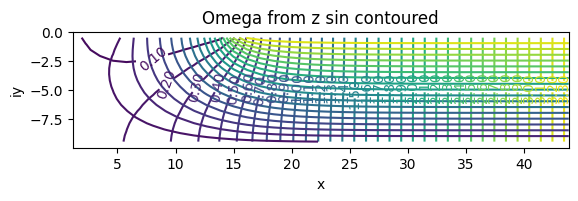

In [195]:
Om = omega_fr_z_sin(z=Z, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

fig, ax = plt.subplots()
ax.set(title='Omega from z sin contoured', xlabel='x', ylabel='iy')

C = ax.contour(Z.real, Z.imag, Om.real, levels=40)
ax.clabel(C, levels=C.levels, fmt='%.2f')
ax.contour(Z.real, Z.imag, Om.imag, levels=20)
ax.set_ylim(np.imag(pnts['D']), 0)
ax.grid=True
ax.set_aspect(1.0)


## The drawdown at large $x$

$$ \lim_{x\to\infty} = Q(\frac x d + \frac 1 \pi \ln p)$$

Where $p$ comes from the condition that $\zeta_B = -1$ and $\zeta_a = +1$ with $\zeta=\sin\left(\pi\left(i \frac z H - \frac 1 2\right)\right)$

[0.45592383 0.45592412 0.45592439 0.45592464 0.45592487]
Delta phi = 0.46


/Users/Theo/.venvs/flopy/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Theo/.venvs/flopy/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


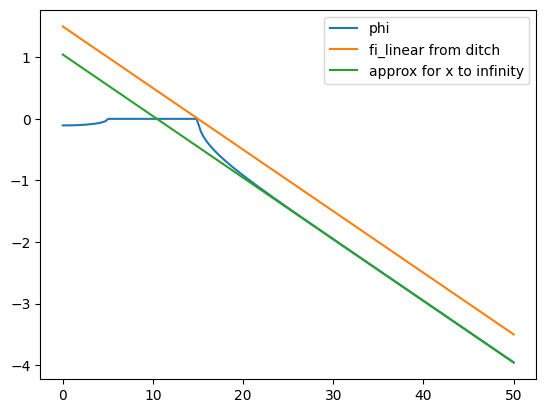

In [222]:

x = np.linspace(0, 50, 200)
H = abs(pnts['D'].imag)
b = pnts['B'].real
p, q = get_pq_sin(D=pnts['D'], A=pnts['A'], B=pnts['B'])


# --- Head decline du to Q when k=1
fi_linear = -Q * (x - pnts['B'].real) / H

# --- Potential Omega
om = omega_fr_z_sin(z=x, Q=1, D=pnts['D'], A=pnts['A'], B=pnts['B'])

# --- Compare graphically
fig, ax = plt.subplots()
ax.plot(x, om.real, label='phi')
ax.plot(x, fi_linear, label='fi_linear from ditch')
ax.plot(x, -Q * (x / H + 1 / np.pi * np.log(p)), label='approx for x to infinity')

# --- The head at x=b is zero subtract the limit at x=b to get the resistance of the ditch
# --- This head is lower than zero, so we take it's negative or absolute value

print((fi_linear - om.real)[-5:])

print(fr"Delta phi = {(Q * (b / H + 1 / np.pi * np.log(p))).real:.2f}")

ax.legend()


## The only thing left is to build the anisotropy in

This involves a pre-scaling both of the horizontal axes and the vertical axes.





## Transformatie et exp

## Analytical solution for flow into a ditich of width b into an aquifer of half-infinite extent

Method 2: Contouring Phi and Psi in the z-plane (using a grid of z-coordinates)

Now we'll compute the head in the ditch relative to  a point 5 H to
the left of the ditch to see how much the ris in head of the ditch is
as a function of H given it infitlrates a fixed flow Q.

In [141]:
def zeta_exp(i=0, z=None, D=None, A=None, B=None):
    """Using exp. to scale z,  step by step approach"""
    H = abs(D.imag)
    w = z  
    if i > 0:
        w = np.exp(np.pi * (z / H + 1j))
    if i > 1:
        p, q = get_pq_exp(D=D, A=A, B=B)        
        w = p * w + q
    if i > 2:
        w = np.arcsin(w)
    if i > 3:
        w = -1j * H * ( w / np.pi - 1 / 2)
    if i > 4:
        w = w * 1 / H
    return w

def omega_exp(z=None, Q=None, D=None, A=None, B=None):
    return Q * zeta_exp(i=5, z=Z, D=D, A=A, B=B)

def get_pq_exp(D=None, A=None, B=None):
    """Calculate p and q for the conformal mapping.""" 
    H = abs(np.imag(D))
    # --- Elegant way, uses zeta_exp above   
    # wA = zeta_exp(i=1, z=A, D=D, A=A, B=B)
    # wB = zeta_exp(i=1, z=B, D=D, A=A, B=B)
    
    # --- Direct way
    wA = np.exp(np.pi * (A  / H + 1j))
    wB = np.exp(np.pi * (B  / H + 1j))
    p = -2 / (wB - wA)
    q = (wB + wA) / (wB - wA)    
    return p, q

def omega_fr_z_exp(z=None, Q=None, D=None, A=None, B=None):
    """Psi will vary between 0 and Q"""
    H = abs(D.imag)
    zeta = np.exp(np.pi * (z  / H + 1j))
    p, q = get_pq_exp(D=D, A=A, B=B)    
    return -1j * Q *  (np.arcsin(p * zeta + q) / np.pi  - 1 / 2)


def z_fr_omega_exp(om=None, Q=None, D=None, A=None, B=None):
    p, q = get_pq_exp(D=D, A=A, B=B)
    return -1j * H + H / np.pi * np.log(
        (np.sin(np.pi * (-1j * om / Q + 1 / 2)) - q) / p)

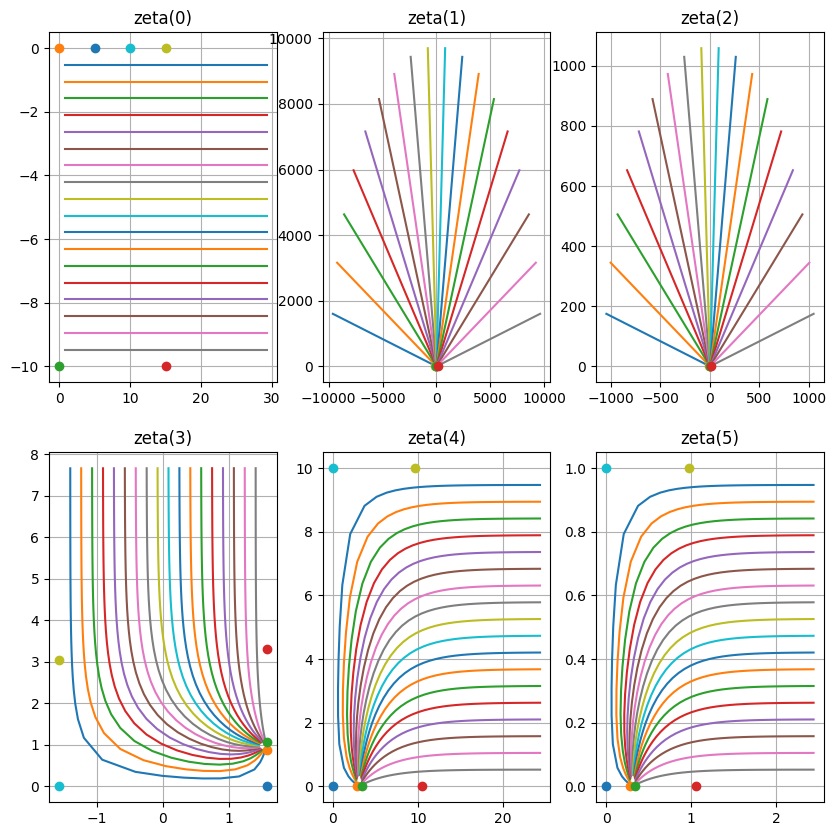

In [151]:
Q, H, b, a = 1.0, 10., 25., 20.
Q, H, b, a = 1.0, 10., 15., 5.

x = np.linspace(0, pnts['Ctop'].real * 2, 40)[1:-1]
y = np.linspace(0, pnts['D'].imag, 20)[1:-1]
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

for ia, ax in enumerate(axs.flatten()):
    if ia > 5:
        break
    ax.set_title(f"zeta({ia})")
    ax.grid(True)
    zta = zeta_exp(ia, z=Z, D=pnts['D'], A=pnts['A'], B=pnts['B'])
    if ia > 5: # Omega 
        zta = zta * Q  /H
    ax.plot(zta.T.real, zta.T.imag)
    for pnm in pnts:
        if ia > 5:
            continue
        P = zeta_exp(ia, z=pnts[pnm], D=pnts['D'], A=pnts['A'], B=pnts['B'])
        ax.plot(P.real, P.imag, 'o', label=pnm)


========= omega_exp =========
 min(phi): 0.06073, max(phi) 2.439
 min(psi): 0.005483, max(psi) 0.9473
========= omega_fr_z_exp =========
 min(phi): 0.06073, max(phi) 2.439
 min(psi): 0.005483, max(psi) 0.9473


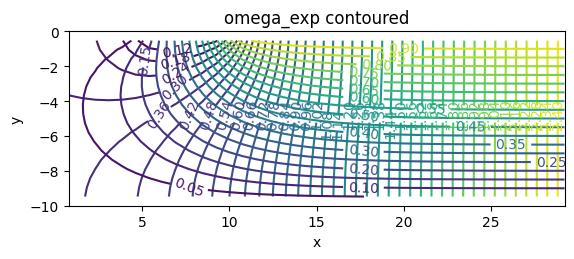

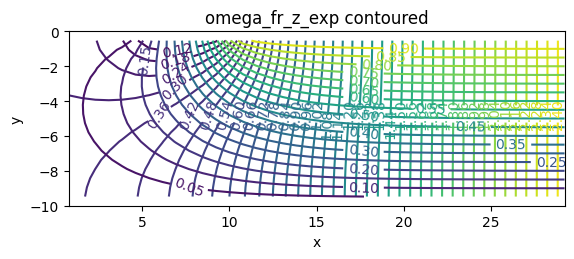

In [160]:
for func in [omega_exp, omega_fr_z_exp]:
    print(f"========= {str(func).split()[1]} =========")
    Om = func(z=Z, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

    fig, ax = plt.subplots()
    ax.set(title=f"{str(func).split()[1]} contoured", xlabel='x', ylabel='y')
    C = ax.contour(Z.real, Z.imag, Om.real, levels=40)
    ax.clabel(C, levels=C.levels, fmt='%2.2f')
    C = ax.contour(Z.real, Z.imag, Om.imag, levels=20)
    ax.clabel(C, levels=C.levels, fmt='%2.2f')

    ax.grid=True
    ax.set_ylim(-10, 0)
    ax.set_aspect(1.0)

    print(f" min(phi): {Om.real.min():.4g}, max(phi) {Om.real.max():.4g}")
    print(f" min(psi): {Om.imag.min():.4g}, max(psi) {Om.imag.max():.4g}")
    


## Method 'exp', direct

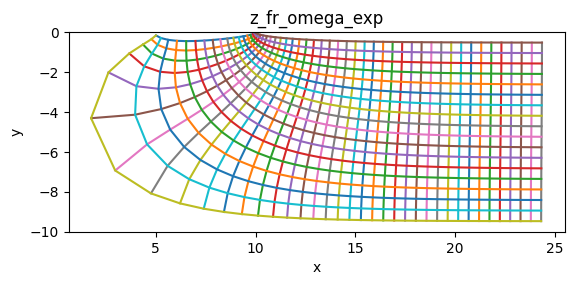

In [148]:
Q = 1.0
psi = np.linspace(0, +1 * Q, 20)[1:-1]
phi = np.linspace(0, 2 * Q, 40)[1:-1]
Phi, Psi = np.meshgrid(phi, psi)
Om = Phi + 1j * Psi

fig, ax = plt.subplots()
func = z_fr_omega_exp

ax.set(title=f"{str(func).split()[1]}", xlabel='x', ylabel='y')
z = z_fr_omega_exp(om=Om, Q=Q, D=pnts['D'], A=pnts['A'], B=pnts['B'])

ax.plot(z.real, z.imag)
ax.plot(z.real.T, z.imag.T)

ax.grid=True
ax.set_ylim(-10, 0)
ax.set_aspect(1.0)


### Verify the transformations by filling the result of the first into the invers transformation and vice versa

This verifies the correctness. When a values is filled in the first transformation and the result of that is filled into the inverse transformation, we should regain the original values. And vice versa. This check is done below.

In [166]:
F = 15. - 1j * 5.

OmF = omega_fr_z_exp(z=F, Q=Q, D=pnts['D'], B=pnts['B'], A=pnts['A'])
zF = z_fr_omega_exp(om=OmF, Q=Q, D=pnts['D'], B=pnts['B'], A=pnts['A'])

print(f"F  : {F:.3f}")
print(f"Omf: {OmF:.3f}")
print(f"zF : {zF:.3f}")

Omf1 = 1.0 + 1j * 0.5 * Q
zF1 = z_fr_omega_exp(om=Omf1, Q=Q, D=pnts['D'], B=pnts['B'], A=pnts['A'])
Omf2 = omega_fr_z_exp(z=zF1, Q=Q, D=pnts['D'], B=pnts['B'], A=pnts['A'])
print('====== omgekeerd =========')
print(f"Omf1: {Omf1:.3f}")
print(f"zF1  : {zF1:.3f}")
print(f"Omf2 : {Omf2:.3f}")



F  : 15.000-5.000j
Omf: 1.018+0.460j
zF : 15.000-5.000j
====== omgekeerd =========
Omf1: 1.000+0.500j
zF1  : 14.867-4.582j
Omf2 : 1.000+0.500j
